Vamos a utilizar el dataset "Wine" que también está disponible en la librería sklearn. Este dataset contiene información química sobre diferentes tipos de vino.

# Ejercicio 1

Carga el dataset Wine desde sklearn.datasets, conviértelo en un DataFrame de pandas y muestra las primeras 5 filas.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the wine dataset into a DataFrame
wine_data = load_wine(as_frame=True)
wine = wine_data.frame

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Ejercicio 2: Estadísticas descriptivas del dataset

Calcula las estadísticas descriptivas para cada una de las características del dataset y el tipo de dato por columna. Además, verifica si existen datos faltantes por columnas.

In [70]:
# Estadísticas descriptivas para cada una de las características del dataset
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [71]:
# Tipo de dato por columna
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [72]:
# Verificar si existen datos faltantes por columnas
wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Se puede observar que no existen datos faltantes en las columnas.

# Ejercicio 3

Usando la columna target, la cual contiene las etiquetas para las categorías de los vinos, cuenta la cantidad de muestras por clase de vino en el dataset.



In [73]:
print("Cantidad de muestras por cada clase de vino:", wine["target"].value_counts(), sep="\n")

Cantidad de muestras por cada clase de vino:
target
1    71
0    59
2    48
Name: count, dtype: int64


# Ejercicio 4

Realiza un histograma para cada característica del dataset. Describe los resultados

Distribución de Variables numéricas


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

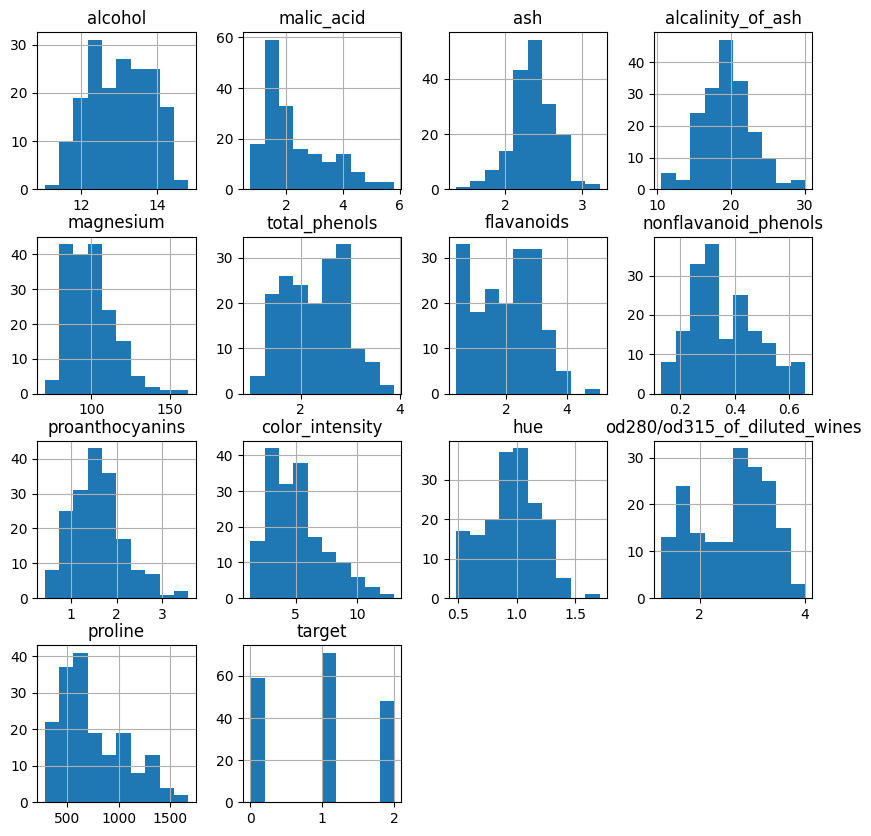

In [74]:
# Crear histogramas para cada característica
print("Distribución de Variables numéricas")
wine.hist(figsize=(10,10))

# Ejercicio 5

Realiza un gráfico de dispersión entre el alcohol y la alcalinidad de las cenizas, coloreando por clase de vino.



<Axes: xlabel='alcohol', ylabel='alcalinity_of_ash'>

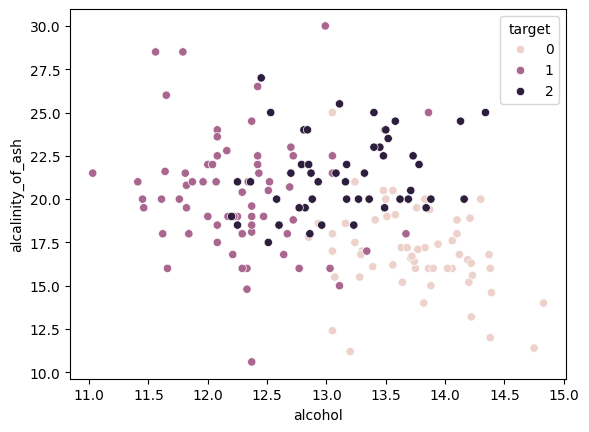

In [75]:
# alcohol vs alcalinity_of_ash
sns.scatterplot(data=wine, x="alcohol", y="alcalinity_of_ash", hue="target")

# Ejercicio 6
Usando el método apply de pd.DataFrame, crea una función que genere una columna nueva ('Category') dentro de df, que contenga variables de tipo string para las categorías de vino.

Es decir, las  muestras de la categoría 0, deben contener 'Clase 0', la categoría 1, 'Clase 1' sucesivamente.

Muestre las 5 primeras columnas.

In [76]:
def categorize_wine(row):
  return f"Clase {int(row['target'])}"

wine_category = wine.apply(categorize_wine, axis=1)
wine["Category"] = wine_category

wine["Category"].head()

0    Clase 0
1    Clase 0
2    Clase 0
3    Clase 0
4    Clase 0
Name: Category, dtype: object

# Ejercicio 7

Realiza un subset sobre el dataframe y guarda todas las columnas, excepto la columna target.

Normaliza las características del dataset utilizando StandardScaler de sklearn.

In [77]:
# Realiza un subset sobre el dataframe y guarda todas las columnas,
# excepto la columna target.
wine_subset = wine.drop(columns=["target", "Category"])

wine_subset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [83]:
# Normaliza las características del dataset utilizando StandardScaler de sklearn.
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Transformar todo el dataframe (usando la estandarización)
scaled_features = scaler.fit_transform(wine_subset)

# Ejemplo 8

Aplica el algoritmo KMeans con 3 clusters al dataset normalizado y agrega los labels resultantes al DataFrame. Para aplicar el clustering por Kmeans, se deben remover las columnas 'Target' y 'Category'.

In [93]:
# Instanciamos un objeto de la clase KMeans con 3 clusters
kmeans = KMeans(init="random", n_clusters=3)

# Ajustar los datos en scaled_features
kmeans.fit(scaled_features)

wine_subset["clusters"] = kmeans.labels_
print(wine_subset.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  clusters  
0        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Ejercicio 9:

Realiza un gráfico de dispersión entre el alcohol y la alcalinidad de las cenizas, coloreando por los clusters obtenidos.

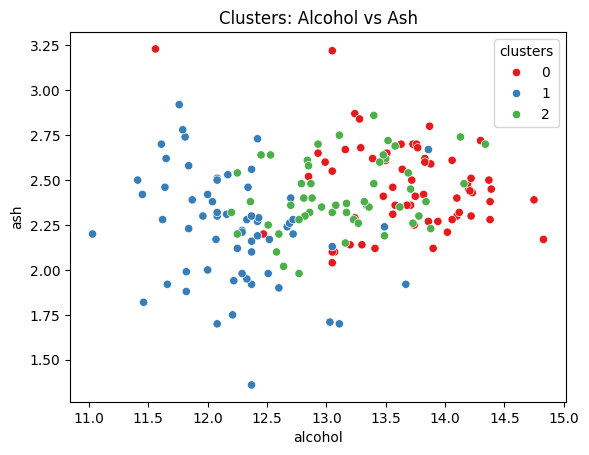

In [94]:
sns.scatterplot(data=wine_subset, x="alcohol", y="ash", hue="clusters", palette="Set1")
plt.title("Clusters: Alcohol vs Ash")
plt.show()

También realiza un gráfico de dispersión utilizando las etiquetas de target. ¿Qué sugieren tus resultados al compararlos con el gráfico anterior?

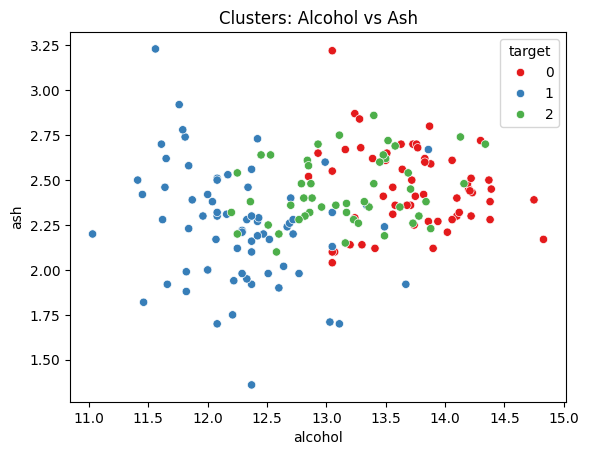

In [91]:
sns.scatterplot(data=wine, x="alcohol", y="ash", hue="target", palette="Set1")
plt.title("Clusters: Alcohol vs Ash")
plt.show()

In [101]:
# Predicción realizada con el KMeans
wine_subset["clusters"].value_counts().sort_index()

clusters
0    62
1    65
2    51
Name: count, dtype: int64

In [99]:
# Columna target del dataset original
wine["target"].sort_index()

target
0    59
1    71
2    48
Name: count, dtype: int64

Los gráficos son bastantes parecidos, aunque los valores del KMeans difieren un poco con la columna target original.

Realice gráficos de boxplot para el nivel del alcohol por target y por cluster. ¿Qué sugieren tus resultados?

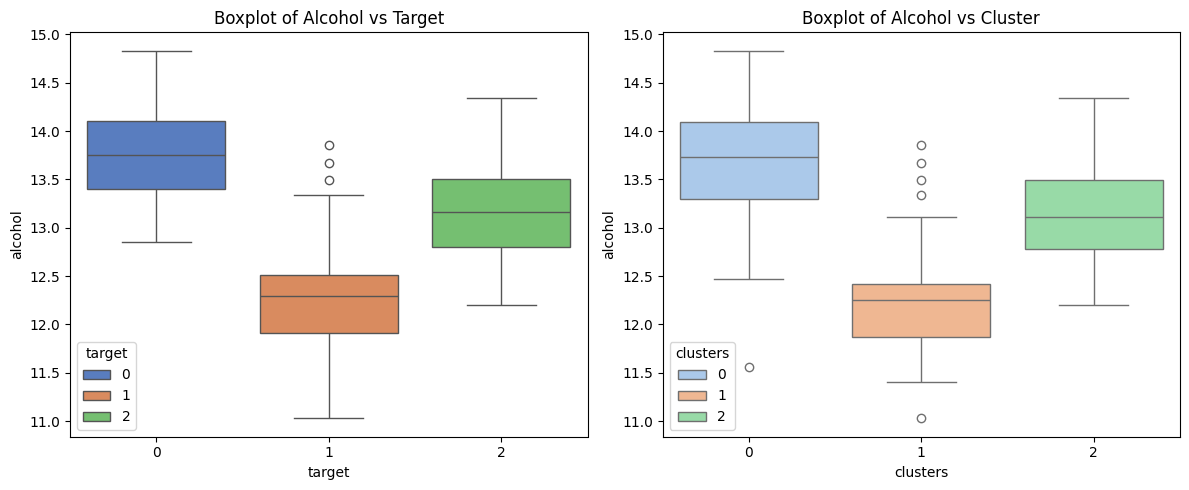

In [112]:
# Crea dos gráficos en una sola figura
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
palette_1 = sns.color_palette("pastel")[0:3]
palette_2 = sns.color_palette("muted")[0:3]

# Crear el boxplot para 'alcohol' vs 'target' en el primer subplot
sns.boxplot(ax=ax[0], x="target", y="alcohol", data=wine, hue="target", palette=palette_2)
ax[0].set_title("Boxplot of Alcohol vs Target")

# Crear el boxplot para 'alcohol' vs 'cluster' en el segundo subplot
sns.boxplot(ax=ax[1], x="clusters", y="alcohol", data=wine_subset, hue="clusters", palette=palette_1)
ax[1].set_title("Boxplot of Alcohol vs Cluster")

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()

Los gráficos de boxplot se acercan bastante.


# Ejercicio 10

Realiza una tabla de contingencia para comparar los clusters obtenidos con las clases originales.

Para realizar este ejercicio, favor consultar el siguiente link:

https://interactivechaos.com/es/python/function/pandascrosstab#:~:text=La%20funci%C3%B3n%20pandas.,especificar%20una%20funci%C3%B3n%20de%20agregaci%C3%B3n.

In [115]:
# Tabla de contingencia
wine_crosstab = pd.crosstab(wine["target"], wine_subset["clusters"])
wine_crosstab

clusters,0,1,2
target,,,
0,59,0,0
1,3,65,3
2,0,0,48


<Axes: xlabel='clusters', ylabel='target'>

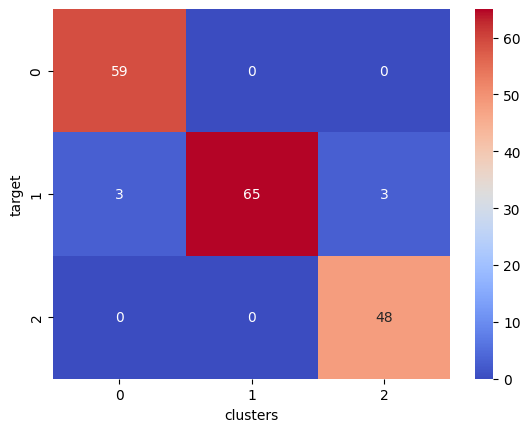

In [116]:
sns.heatmap(wine_crosstab, cmap="coolwarm", annot=True)

# Ejercicio 11

Realice una gráfico de codo y muestra el número óptimo de cluster. Verifica tu respuesta mediante el uso de la librería kneed. Muestre ambos gráficos (el realizado mediante la determinación propia de k y el gráfico hecho mediante knee.

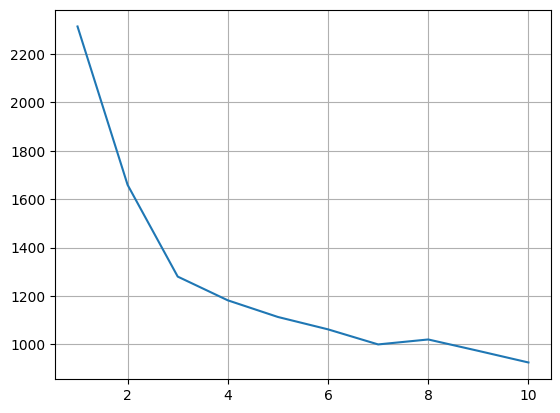

In [118]:
# Realice una gráfico de codo y muestra el número óptimo de cluster.
K = range(1, 11)
sse = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(scaled_features)

    sse.append(model.inertia_)

sns.lineplot(x=K, y=sse)
plt.grid()
plt.show()

Según el método del codo la cantidad óptima de clusters es de 3.

In [119]:
!pip install kneed

In [122]:
from kneed import KneeLocator

# Verifica tu respuesta mediante el uso de la librería kneed
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

La librería kneed confirma que el número óptimo de clusters es de 3.

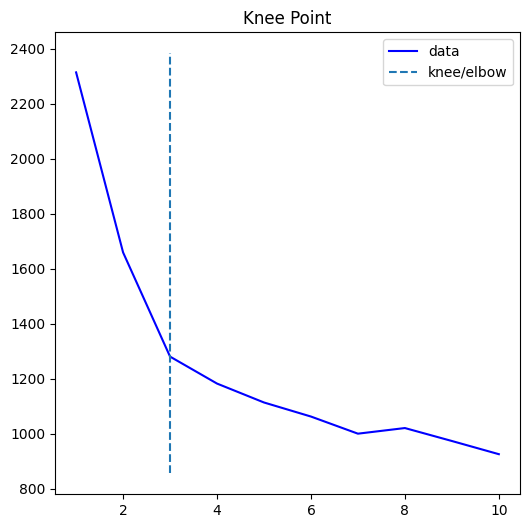

In [123]:
kl.plot_knee()